
-----
#### MS: Unique patterns of mutations in childhood cancer highlight chemotherapy’s disease-defining role at relapse
### Main Figure 1
-----

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

import seaborn as sns

from pywaffle import Waffle

import os

In [2]:
import sys
print(sys.version)

3.11.6 (v3.11.6:8b6ee5ba3b, Oct  2 2023, 11:18:21) [Clang 13.0.0 (clang-1300.0.29.30)]


-----
##### Set up input / output directories

-----
## Panel a

In [3]:
## Provide an output directory for figures or use 'installation_folder/figures' directory
root_dir = os.path.dirname(os.getcwd())
fig_out = os.path.join(root_dir, 'figures')
## Or provide a results path
#fig_out = '/Users/dir1/dir2/Figures'

In [ ]:
## Load patients metadata
kzm611_md = pd.read_csv(os.path.join(root_dir, 'source_data/KZM_md.txt'), sep='\t', index_col=0)
treated_samples = kzm611_md[kzm611_md.Therapy=='Post-Therapy'].index.tolist()
kzm611_md.head(2)

,Patient_id,Cohort,State,Therapy,Sex,Type,Type_Full,Tumor_class,SBS,DBS,ID,Thr_State,SBS_Burden,Radiation
Sample_id,,,,,,,,,,,,,,
KiCS0002_321321,KiCS0002,KiCS,Non-Primary,Post-Therapy,Female,YST,Yolk Sac Tumor,Solid,15207,403,1117,Advanced-Treated,low,N
KiCS0003_285201,KiCS0003,KiCS,Non-Primary,Post-Therapy,Female,MFT,Myofibroblastic Tumor,Solid,1596,7,175,Advanced-Treated,low,N


In [5]:
KZM_class_df = pd.read_csv(os.path.join(root_dir, 'source_data/KZM_therapy_classes_NY.txt'), sep='\t', index_col=0)
KZM_class_df[KZM_class_df.Platinums=='Y'].shape

(173, 16)

In [6]:
## Create dict of drug classes
drug_classes = pd.read_csv(os.path.join(root_dir, 'source_data/Therapy_categories.tsv'), sep='\t', engine='python')
drug_class_dict = dict(zip(drug_classes.Drug, drug_classes.Class))
drug_subclass_dict = dict(zip(drug_classes.Drug, drug_classes.Subclass))

In [7]:
KZM_drugs_df = pd.read_csv(os.path.join(root_dir, 'source_data/KZM_therapy_individuals_counts.txt'), sep='\t', index_col=0)
KZM_drugs_df = pd.concat([KZM_drugs_df, kzm611_md[['Radiation', 'Type']]], axis=1)
KZM_drugs_df.Radiation = [1 if KZM_drugs_df.Radiation.iloc[x]=='Y' else 0 for x in range(KZM_drugs_df.shape[0])]

print(f"Total number of therapy agents used + Radiation therapy: {KZM_drugs_df.shape[1]-1}")
print(f"Total number of therapy data points collected: {KZM_drugs_df.iloc[:,0:-1].sum().sum()}")

Total number of therapy agents used + Radiation therapy: 86
Total number of therapy data points collected: 3195


In [8]:
tumor_names = pd.read_csv(os.path.join(root_dir, 'source_data/tumor_names.txt'), sep='\t')
tumor_names.head(2)

,Tumor_name_short,Tumor_name_full
0,YST,Yolk Sac Tumor
1,MFT,Myofibroblastic Tumor


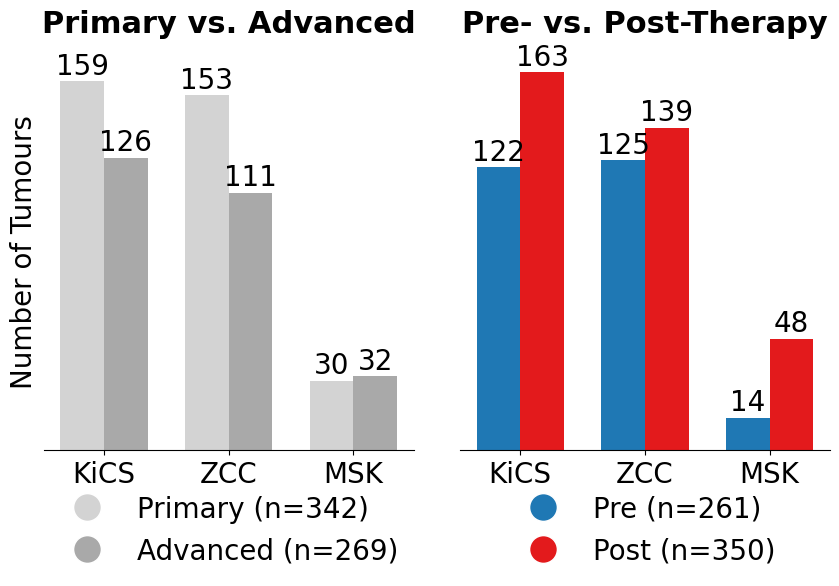

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sample data
data_primary_advanced = pd.DataFrame({
    'Cohort': ['KiCS', 'ZCC', 'MSK'],
    'Primary (n=342)': [159, 153, 30],
    'Advanced (n=269)': [126, 111, 32]
})

data_pre_post = pd.DataFrame({
    'Cohort': ['KiCS', 'ZCC', 'MSK'],
    'Pre (n=261)': [122, 125, 14],
    'Post (n=350)': [163, 139, 48]
})

def plot_grouped_bar_with_labels(df, title, colors, labels, ylab, ax):
    x = np.arange(len(df['Cohort']))
    width = 0.35

    bars1 = ax.bar(x - width/2, df[labels[0]], width, label=labels[0], color=colors[0])
    bars2 = ax.bar(x + width/2, df[labels[1]], width, label=labels[1], color=colors[1])

    # Add count labels above each bar
    for bar in bars1 + bars2:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.5,
            f'{int(height)}',
            ha='center',
            va='bottom',
            fontsize=20
        )

    ax.set_title(title, fontsize=22, pad=15, weight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(df['Cohort'], fontsize=20)
    ax.set_yticks([])
    ax.set_yticklabels([])
    if ylab:
        ax.set_ylabel('Number of Tumours', fontsize=20)
    #ax.legend(title='', fontsize=14)

    # Remove gridlines and spines
    ax.grid(False)
    ax.spines[['left', 'right', 'top']].set_visible(False)

    # === LEGEND ===
    custom_lines = [
        Line2D([0], [0], color='white', marker='o', mfc=colors[0], ms=20),
        Line2D([0], [0], color='white', marker='o', mfc=colors[1], ms=20),
    ]
    ax.legend(
        custom_lines, labels,
        loc='upper center',
        bbox_to_anchor=(0.5, -0.05),
        ncol=1,
        fontsize=20,
        frameon=False
    )

# Plot both subplots
fig, axes = plt.subplots(1, 2, figsize=(8.5, 6), sharey=True)

plot_grouped_bar_with_labels(
    data_primary_advanced,
    'Primary vs. Advanced',
    colors=['lightgray', 'darkgray'],
    labels=['Primary (n=342)', 'Advanced (n=269)'],
    ylab=True,
    ax=axes[0]
)

plot_grouped_bar_with_labels(
    data_pre_post,
    'Pre- vs. Post-Therapy',
    colors=['#1f78b4', '#e31a1c'],
    labels=['Pre (n=261)', 'Post (n=350)'],
    ylab=False,
    ax=axes[1]
)

plt.tight_layout()
#fig.savefig(os.path.join(fig_out, "Fig_1a_rev.pdf"), bbox_inches="tight")

-----
## Panels c-e

-----
##### Import patients metadata

In [11]:
## Binary (0,1) version
KZM_drugs_bin = KZM_drugs_df.iloc[:,0:-1].copy()
KZM_drugs_bin[KZM_drugs_bin>0] = 1

In [9]:
KZM_drugs_bin2 = KZM_drugs_bin.copy()
KZM_drugs_bin2['Patient_id'] = [kzm611_md.loc[x, 'Patient_id'] for x in KZM_drugs_bin2.index]
patients_df = KZM_drugs_bin2.groupby('Patient_id').sum()
patients_thr_df = KZM_drugs_bin2.loc[treated_samples].groupby('Patient_id').sum()

print(f"Average number of drugs per patient: {patients_df.sum(axis=1).mean()}")
print(f"Average number of drugs per treated patient: {patients_thr_df.sum(axis=1).mean()}")

Average number of drugs per patient: 2.555350553505535
Average number of drugs per treated patient: 4.537704918032787


In [27]:
KZM_drugs_df = KZM_drugs_df[KZM_drugs_bin.loc[:, KZM_drugs_bin.sum(axis=0)>1].columns.tolist()+['Type']]
KZM_drugs_df.shape

(611, 57)

In [13]:
KZM_drugs_pat = KZM_drugs_df.copy()
KZM_drugs_pat['Patient_id'] = [kzm611_md.loc[x, 'Patient_id'] for x in KZM_drugs_pat.index]
KZM_drugs_pat = KZM_drugs_pat.drop(['Type'], axis=1)
KZM_drugs_pat.head(2)

,Dacarbazine,MIBG,Tazematostat,Thioguanine,Daunorubicin,Cyclophosphamide,Methotrexate,Oxaliplatin,Temozolomide,Docetaxel,...,Cytarabine,GMCSF,Dinutuximab,Asparaginase,Paclitaxel,Lomustine,Cisplatin,Leucovorin,Radiation,Patient_id
KiCS0002_321321,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,5,0,0,KiCS0002
KiCS0003_285201,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,KiCS0003


In [14]:
KZM_drugs_pat_post = KZM_drugs_pat.copy()
KZM_drugs_pat_post['total'] = KZM_drugs_pat_post.iloc[:,0:-1].sum(axis=1)
KZM_drugs_pat_post = KZM_drugs_pat_post[KZM_drugs_pat_post.total>0]
KZM_drugs_pat_post = KZM_drugs_pat_post.drop(['total'], axis=1)
KZM_drugs_pat_post.Patient_id.nunique()

238

In [15]:
KZM_drugs_pat_post = KZM_drugs_pat_post.groupby('Patient_id').sum()
KZM_drugs_pat_post = KZM_drugs_pat_post.map(lambda x: 1 if x != 0 else 0)

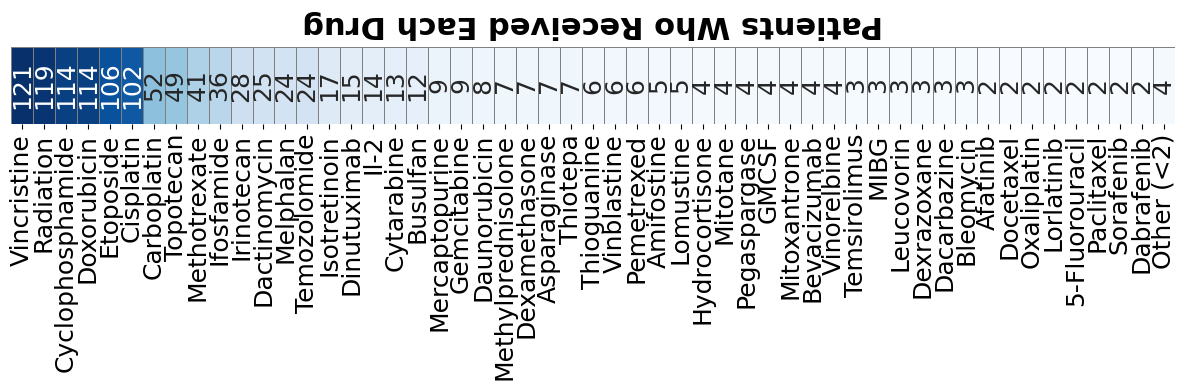

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Compute drug counts
drug_counts = KZM_drugs_pat_post.sum().sort_values(ascending=False)

# Separate into frequent and rare drugs
threshold = 2
frequent = drug_counts[drug_counts >= threshold]
rare_total = drug_counts[drug_counts < threshold].sum()


# Combine with 'Other' using concat (not append)
drug_counts_grouped = pd.concat([frequent, pd.Series({f'Other (<{threshold})': rare_total})])

# Build DataFrame
df_tile = pd.DataFrame({
    'Drug': drug_counts_grouped.index,
    'Patients': drug_counts_grouped.values
})
df_tile['Normalized'] = df_tile['Patients'] / df_tile['Patients'].max()

# Create annotation matrix
annot_matrix = df_tile['Patients'].values.reshape(1, -1)

# Plot
#plt.figure(figsize=(max(8, len(df_tile) * 0.3), 3))
plt.figure(figsize=(12, 4))

sns.heatmap(
    df_tile[['Normalized']].T,
    cmap="Blues",
    cbar=False,
    xticklabels=df_tile['Drug'],
    yticklabels=[],
    annot=annot_matrix,
    fmt='d',
    annot_kws={"rotation": 90, "va": "center", "ha": "center", "fontsize": 18},
    linewidths=0.5,
    linecolor='gray'
)

plt.xticks(rotation=90, ha='center', fontsize=18)
plt.title("Patients Who Received Each Drug", pad=10, fontsize=22, rotation=180, weight='bold')
plt.tight_layout()
#plt.savefig(os.path.join(fig_out, "Fig_1d_rev2.pdf"), bbox_inches="tight")

In [17]:
patient_totals = KZM_drugs_pat_post.sum(axis=1)

/Users/mehdi/Documents/py_envs/ms_rev1/lib/python3.11/site-packages/matplotlib/transforms.py:365: RuntimeWarning: invalid value encountered in scalar subtract
  return points[1, 0] - points[0, 0]
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


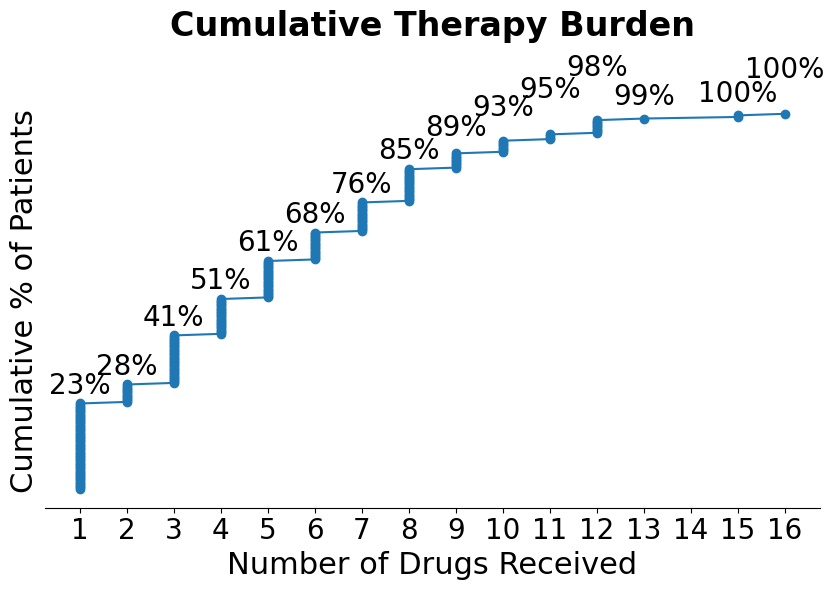

In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF

# Compute ECDF
ecdf = ECDF(patient_totals)
x_vals = pd.Series(ecdf.x)
y_vals = pd.Series(ecdf.y * 100)

# Find the max y for each unique x
df_ecdf = pd.DataFrame({'x': x_vals, 'y': y_vals})
df_ecdf_unique = df_ecdf.groupby('x', as_index=False).max()

# Plot ECDF
plt.figure(figsize=(8.5, 6))
ax = plt.plot(ecdf.x, ecdf.y * 100, marker='o', linestyle='-')

offsets = [1,1,1,1,1,1,1,1,1,3,5,8,10,2,2,8]

for i, (x, y) in enumerate(zip(df_ecdf_unique['x'], df_ecdf_unique['y'])):
    plt.text(
        x, y + offsets[i],
        f"{y:.0f}%",
        ha='center', va='bottom',
        fontsize=20
    )

# Format plot
plt.xticks(range(patient_totals.min(), patient_totals.max() + 1), fontsize=20)
plt.xlabel("Number of Drugs Received", fontsize=22)
plt.ylabel("Cumulative % of Patients", fontsize=22)
plt.title("Cumulative Therapy Burden\n", fontsize=24, pad=15,weight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().spines[['left', 'top', 'right']].set_visible(False)
plt.grid(False)
plt.yticks([])
plt.tight_layout()
#plt.savefig(os.path.join(fig_out, "Fig_1c_rev.pdf"), bbox_inches="tight")

In [19]:
## Get cancer type total & treated sample numbers
type_counts = pd.DataFrame(kzm611_md.Type.value_counts())
type_counts.columns = ['Counts']
type_counts['Type'] = type_counts.index.tolist()

type_post = []

for x in type_counts.Type:
    thr_tab = pd.DataFrame(kzm611_md.loc[kzm611_md.Type==x, 'Therapy'].value_counts())
    if 'Post-Therapy' in thr_tab.index.tolist():
        type_post.append(thr_tab.loc['Post-Therapy', 'count'])
    else:
        type_post.append(0)

type_counts['Treated'] = type_post

type_counts.Type = [x if type_counts.loc[x, 'Counts']>2 else 'Other' for x in type_counts.Type]
type_counts = type_counts.reset_index(drop=True)
type_counts = type_counts.groupby(['Type']).sum()
type_counts['Type'] = type_counts.index.tolist()
type_counts = type_counts.sort_values(['Counts'], ascending=False)
type_counts = type_counts.reindex(type_counts.index.drop('Other').tolist() + ['Other'])
type_counts.head(2)

,Counts,Treated,Type
Type,,,
NBL,88,78,NBL
HGG,54,21,HGG


In [20]:
abbr_dict = (
    tumor_names[tumor_names["Tumor_name_short"] != "Other"]
    .drop_duplicates(subset=["Tumor_name_short"])  # ensure no duplicates
    .set_index("Tumor_name_short")["Tumor_name_full"]
    .to_dict()
)
abbr_dict['Other'] = 'Other'

In [21]:
type_counts['Tumor'] = [abbr_dict[x] for x in type_counts.Type]

In [22]:
KZM_class_from_drugs = KZM_drugs_df.drop(['Type'], axis=1).copy()

KZM_class_from_drugs.columns = [drug_subclass_dict[x] for x in KZM_class_from_drugs.columns]
KZM_class_from_drugs = KZM_class_from_drugs.groupby(level=0, axis=1).sum()

KZM_class_from_drugs = KZM_class_from_drugs.map(lambda x: 1 if x > 0 else 0)

kzm_class_bin = KZM_class_df.map(lambda x: 1 if x == 'Y' else 0)
kzm_class_bin['Other'] = [KZM_class_from_drugs.loc[x, 'Other'] for x in kzm_class_bin.index]
kzm_class_bin['Other'] += kzm_class_bin['Antitumor antibiotic']
kzm_class_bin = kzm_class_bin.drop(['Therapy', 'Antitumor antibiotic'], axis=1)
kzm_class_bin['Type'] = [kzm611_md.loc[x, 'Type'] for x in kzm_class_bin.index]

#kzm_class_bin.iloc[:, 0:-1] = kzm_class_bin.iloc[:, 0:-1].map(lambda x: 1 if x != 0 else 0)
kzm_class_bin.Type = [x if kzm_class_bin.Type.value_counts()[x]>2 else 'Other' for x in kzm_class_bin.Type]
kzm_class_bin['Total'] = kzm_class_bin.iloc[:, 0:-1].sum(axis=1)
kzm_class_bin = kzm_class_bin[kzm_class_bin.Total>0]
kzm_class_bin =kzm_class_bin.drop('Total', axis=1)
df_counts = kzm_class_bin.groupby('Type').sum()

/var/folders/v_/5kvb1yw12gg5hlp_37y4c84w0000gp/T/ipykernel_73875/2299493843.py:4: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  KZM_class_from_drugs = KZM_class_from_drugs.groupby(level=0, axis=1).sum()


In [ ]:
type_counts2 = type_counts.copy()
type_counts2 =type_counts2[type_counts2.Type.isin(df_counts.index.tolist())]
type_counts2['Tumor_2'] = [f"{type_counts2.Tumor.iloc[x]} ({type_counts2.Type.iloc[x]})" for x in range(type_counts2.shape[0])]

/var/folders/v_/5kvb1yw12gg5hlp_37y4c84w0000gp/T/ipykernel_73875/2459134014.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center', fontsize=17) # Rotate vertically, align right


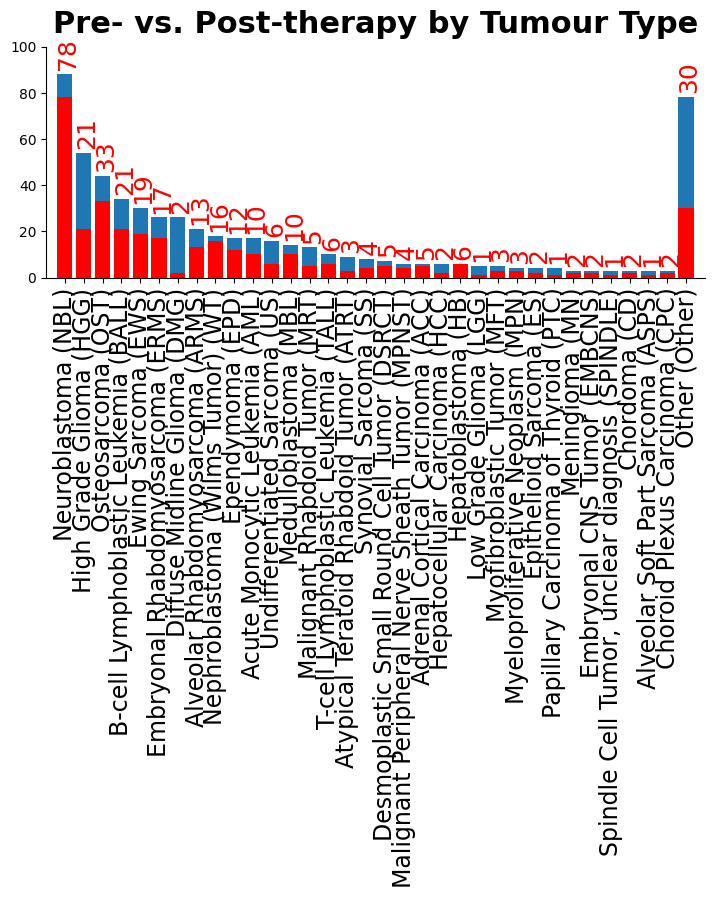

In [25]:
fig, ax = plt.subplots(figsize=(8.5, 3))

ax.bar(type_counts2.Tumor_2, type_counts2.Counts)
ax.set_xlim([-1, len(type_counts2)])
ax.set_ylim([0, 100])

ax.bar(type_counts2.Tumor_2, type_counts2.Treated, color='red')
for i, v in enumerate(type_counts2.Treated):
    ax.text(i-0.45, type_counts2.Counts.iloc[i] + 4, str(v), color='red', fontsize=18, rotation=90)
    
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center', fontsize=17) # Rotate vertically, align right

plt.title("Pre- vs. Post-therapy by Tumour Type", pad=10, fontsize=22, weight='bold')


ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.grid(False)

[None, None]

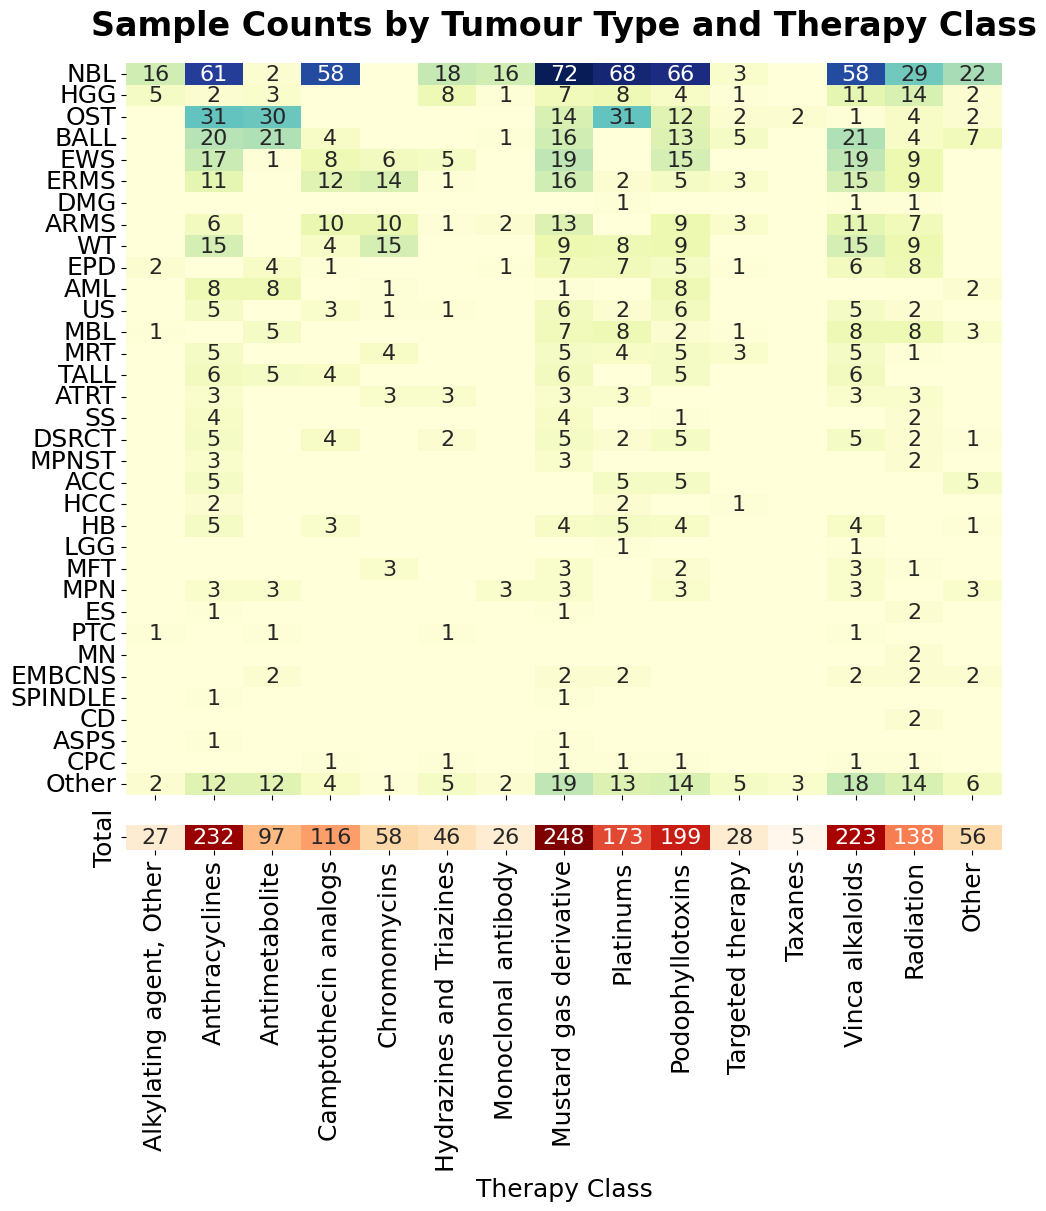

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

'''# Sample data: Tumor types
tumor_types = ['Neuroblastoma', 'Osteosarcoma', 'Leukemia', 'Brain Tumor', 'Lymphoma']

# Sample data: Therapies (like Radiation, Platinum, Mustard gas derivatives)
therapies = ['Radiation', 'Platinum', 'Mustard Gas', 'Topoisomerase Inhibitors', 'Other Chemo']

# Generate a random counts matrix for how many tumors of each type received each therapy
np.random.seed(42)
data_counts = np.random.randint(0, 40, size=(len(tumor_types), len(therapies)))

# Create a DataFrame for plotting
df_counts = pd.DataFrame(data_counts, index=tumor_types, columns=therapies)'''

df_counts = df_counts.loc[type_counts2.Type.tolist()]


# Panel 1: Heatmap of tumor counts by tumor type and therapy
# Panel 2: Row sums = number of tumors receiving each therapy
therapy_totals = df_counts.sum(axis=0)
# Panel 3: Column sums = number of tumors per tumor type
tumor_totals = df_counts.sum(axis=1)

# Set up figure with 3 heatmap panels stacked vertically
fig, axs = plt.subplots(2, 1, figsize=(10, 12), gridspec_kw={'height_ratios': [29, 1]}, constrained_layout=True)

annot_data = df_counts.copy()
annot_data = annot_data.map(lambda x: f"{x}" if x != 0 else "")
# 1) Main heatmap: tumor counts by tumor type (rows) and therapy (columns)
sns.heatmap(df_counts, annot=annot_data,
            annot_kws={"va": "center", "ha": "center", "fontsize": 16},
            fmt='', cmap='YlGnBu', cbar=False, ax=axs[0])
axs[0].set_title('Sample Counts by Tumour Type and Therapy Class', pad=20, fontsize=24, weight='bold')
axs[0].set_ylabel('')

# Hide x-axis labels on top panel to avoid repetition
axs[0].set_xticklabels([])
axs[0].set_xlabel('')
axs[0].tick_params(axis='y', labelsize=18)

# 2) Therapy counts heatmap (single row)
df_therapy_totals = pd.DataFrame(therapy_totals).T
df_therapy_totals.index = ['Total']

sns.heatmap(df_therapy_totals, annot=True,
            annot_kws={"va": "center", "ha": "center", "fontsize": 16},
            fmt='d', cmap='OrRd', cbar=False, ax=axs[1])
axs[1].set_title('')
axs[1].set_xlabel('Therapy Class', fontsize=18)
axs[1].set_ylabel('')
#axs[1].tick_params(axis='x', rotation=45, horizontalalignment='right', labelsize=16)
plt.setp(axs[1].get_xticklabels(), horizontalalignment='center', fontsize=18)
plt.setp(axs[1].get_yticklabels(), fontsize=18)


#plt.savefig(os.path.join(fig_out, 'Fig_1e_rev.pdf'), bbox_inches="tight")